# Homework 4

## Imports

In [23]:
import pandas as pd
from scipy.io.arff import loadarff
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import silhouette_score, silhouette_samples
from pathlib import Path
import math


## Loading Data Set

In [24]:
IMAGES_DIR = Path('images')
IMAGES_DIR.mkdir(parents=True, exist_ok=True)
DATA_DIR = Path('data')
DATA_DIR.mkdir(parents=True, exist_ok=True)
DATA_FILE = 'column_diagnosis.arff'
DATA_PATH = DATA_DIR / DATA_FILE
data = loadarff(DATA_PATH)
df = pd.DataFrame(data[0])
df['class'] = df['class'].str.decode('utf-8')
# Show the first 5 rows
df.head()

pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope   
0         63.027817    22.552586              39.609117     40.475232  \
1         39.056951    10.060991              25.015378     28.995960   
2         68.832021    22.218482              50.092194     46.613539   
3         69.297008    24.652878              44.311238     44.644130   
4         49.712859     9.652075              28.317406     40.060784   

   pelvic_radius  degree_spondylolisthesis   class  
0      98.672917                 -0.254400  Hernia  
1     114.405425                  4.564259  Hernia  
2     105.985135                 -3.530317  Hernia  
3     101.868495                 11.211523  Hernia  
4     108.168725                  7.918501  Hernia

## Preprocessing

In [25]:
# Make the data unsupervised
X = df.drop('class', axis=1)

# Ground truth
y = df['class']

# Normalize the data using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

## Question 1

In [26]:
# Apply K-means clustering for k ∈ {2, 3, 4, 5}
k_values = [2, 3, 4, 5]
silhouette_scores = []
purity_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k,
                    random_state=0)
    cluster_labels = kmeans.fit_predict(X_scaled)

    # Calculate silhouette score for each sample
    silhouette = silhouette_samples(X_scaled, cluster_labels)

    # Split the silhouette scores by cluster
    silhouette_per_cluster = [silhouette[cluster_labels == i] for i in range(k)]

    # Calculate the average silhouette score for each cluster
    silhouette_per_cluster_avg = [np.mean(silhouette_per_cluster[i]) for i in range(k)]

    # Calculate the average silhouette score for all clusters
    silhouette_avg = np.mean(silhouette_per_cluster_avg)
    print(f'Silhouette score for {k} clusters: {silhouette_avg:.5f}')
    silhouette_scores.append(silhouette_avg)

    # Purity
    clusters = {i: [] for i in range(k)}
    for i in range(len(cluster_labels)):
        clusters[cluster_labels[i]].append(y[i])

    # Count the most frequent class in each cluster
    cluster_purities = [clusters[i].count(max(clusters[i], key=clusters[i].count)) for i in range(k)]

    # Calculate purity
    purity = sum(cluster_purities) / len(y)
    purity_scores.append(purity)
    print(f'Purity score for {k} clusters: {purity:.5f}')

# Plot the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.xticks(k_values)
plt.ylabel('Silhouette score')
plt.title('Silhouette score for different number of clusters')
# Write the silhouette scores on the plot
for i, score in enumerate(silhouette_scores):
    plt.text(k_values[i] + 0.02, score + 0.001, f'{score:.5f}', bbox=dict(facecolor='white', alpha=0.8))
plt.savefig(IMAGES_DIR / 'silhouette.png')
plt.show()

# Plot the purity scores
plt.figure(figsize=(10, 6))
plt.plot(k_values, purity_scores, marker='o')
plt.xlabel('Number of clusters')
plt.xticks(k_values)
plt.ylabel('Purity score')
plt.title('Purity score for different number of clusters')
# Write the purity scores on the plot
for i, score in enumerate(purity_scores):
    plt.text(k_values[i] + 0.02, score + 0.001, f'{score:.5f}', bbox=dict(facecolor='white', alpha=0.5))
plt.savefig(IMAGES_DIR / 'purity.png')
plt.show()

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for 2 clusters: 0.34478
Purity score for 2 clusters: 0.62903
Silhouette score for 3 clusters: 0.27273
Purity score for 3 clusters: 0.66774
Silhouette score for 4 clusters: 0.23819
Purity score for 4 clusters: 0.66129
Silhouette score for 5 clusters: 0.22962
Purity score for 5 clusters: 0.67419


### Comment:
- For k=2, the silhouette score is 0.34478 and the purity score is 0.62903. Indicating that the clustering with two clusters has relatively good cohesion and separation, with data points well-matched to their own clusters and somewhat distant from other clusters. The purity score suggests that the majority of data points within each cluster belong to the same class, but there
is some mixing of classes.
- For k=3, the silhouette score decreases to 0.27273, which may indicate some overlap or less distinct clusters. However, the purity score improves to 0.66774, indicating that each cluster contains a higher proportion of data points from a single class. This suggests a trade-off between silhouette and purity.
- For k=4, the silhouette score further decreases to 0.23819, indicating more overlap or less distinct clusters. The purity score remains relatively high at 0.66129, indicating good consistency with class labels.
- For k=5, the silhouette score decreases to 0.22962, indicating more overlap or less distinct clusters. The purity score remains relatively high at 0.67419, indicating good consistency with class labels.

Overall, these results show that the choice of the number of clusters (k) affects the quality of the clustering solution. A smaller k (k=2) results in better silhouette scores but lower purity, indicating that clusters are more distinct but not as pure in terms of class membership. A larger k (k=5) provides higher purity but lower silhouette scores, suggesting more class consistency but potentially less distinct clusters. The choice of k should be made based on the specific aim of the clustering task, considering the trade-off between silhouette and purity.

## Question 2

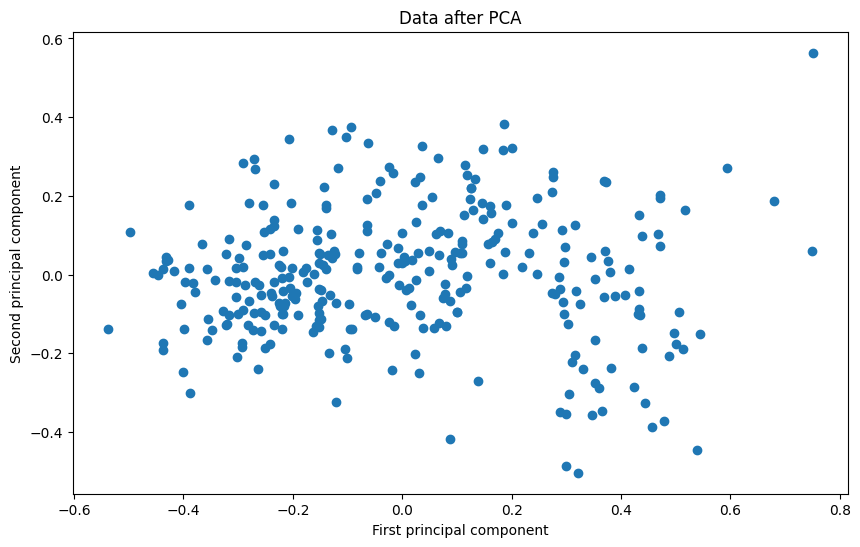

In [27]:
# Apply PCA to reduce the dimensionality to 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot the data
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('Data after PCA')
plt.savefig(IMAGES_DIR / 'pca.png')
plt.show()

### i) Identify the variability explained by the top two principal components.

In [28]:
print(f'Explained variance: {pca.explained_variance_ratio_}')

Explained variance: [0.56181445 0.20955953]


### Comment:

When considering the variability explained by the top two principal components in a PCA (Principal Component Analysis), the values represent the proportion of total variance in the data that is captured by each of these components.

- PC1 captures the largest portion of variance in the data, about 57%. This suggests that PC1 is a significant component that summarizes the primary patterns in the data. A high value for PC1 indicates that it carries substantial information about the relationships between the original features.
- PC2 explains the next largest portion of variance after PC1. It captures approximately 20.96% of the total variability. While PC2 has less explanatory power than PC1, it is still an important component that contributes significantly to the data's structure. PC2 may represent additional patterns that are orthogonal to those captured by PC1.
When summing the explained variances of PC1 and PC2 (0.56181445 + 0.20955953), you get a total explained variance of approximately 77.14%. This means that these two principal components collectively account for approximately 77.14% of the total variance in the data.

The proportion of variance explained by the top principal components informs about the dimensionality reduction achieved by the PCA. In this case, a significant amount of variability is retained by considering only the top two principal components, which can be beneficial for simplifying the data while preserving the most essential information.
However, one may need to perform a deeper analysis of the eigenvectors associated with these components to help identify which original features contribute the most to each principal component.

### ii) For each one of these two components, sort the input variables by relevance by inspecting the absolute weights of the linear projection.

In [29]:
# Compute Column Importance for each component
xvector = pca.components_[0] * max(X_pca[:,0])
yvector = pca.components_[1] * max(X_pca[:,1])

columns = X.columns
impt_features = {columns[i] : math.sqrt(xvector[i]**2) for i in range(len(columns))}
sorted_features = sorted(zip(impt_features.values(),impt_features.keys()),reverse=True)
print("Features by importance for first component:\n")
for i in range(len(sorted_features)):
    print(f'{sorted_features[i][1]} : {sorted_features[i][0]:.5f}')

impt_features = {columns[i] : math.sqrt(yvector[i]**2) for i in range(len(columns))}
sorted_features = sorted(zip(impt_features.values(),impt_features.keys()),reverse=True)
print("\nFeatures by importance for second component:\n")
for i in range(len(sorted_features)):
    print(f'{sorted_features[i][1]} : {sorted_features[i][0]:.5f}')

# Compute Column Importance and Sort
columns = X.columns
impt_features = {columns[i] : math.sqrt(xvector[i]**2 + yvector[i]**2) for i in range(len(columns))}
sorted_features = sorted(zip(impt_features.values(),impt_features.keys()),reverse=True)
print("\nFeatures by importance:\n")
for i in range(len(sorted_features)):
    print(f'{sorted_features[i][1]} : {sorted_features[i][0]:.5f}')

Features by importance for first component:

pelvic_incidence : 0.44394
lumbar_lordosis_angle : 0.38651
pelvic_tilt : 0.35046
sacral_slope : 0.24439
degree_spondylolisthesis : 0.16278
pelvic_radius : 0.08691

Features by importance for second component:

pelvic_tilt : 0.37797
pelvic_radius : 0.32762
sacral_slope : 0.24994
pelvic_incidence : 0.05640
lumbar_lordosis_angle : 0.04513
degree_spondylolisthesis : 0.00258

Features by importance:

pelvic_tilt : 0.51544
pelvic_incidence : 0.44751
lumbar_lordosis_angle : 0.38913
sacral_slope : 0.34957
pelvic_radius : 0.33895
degree_spondylolisthesis : 0.16280


### Comment:
The first principal component (PC1) is mainly influenced by features related to pelvic and lumbar angles and tilts. This suggests that PC1 might represent a combination of characteristics related to the angles and tilts of the pelvis and lumbar spine.
The second principal component (PC2) is primarily associated with pelvic tilt and pelvic radius. It may capture variations in the tilt and radius of the pelvic region.
Understanding the feature importance in each principal component can help interpret and use the components for dimensionality reduction or feature selection while preserving the most relevant information in the data.

# Question 3


/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


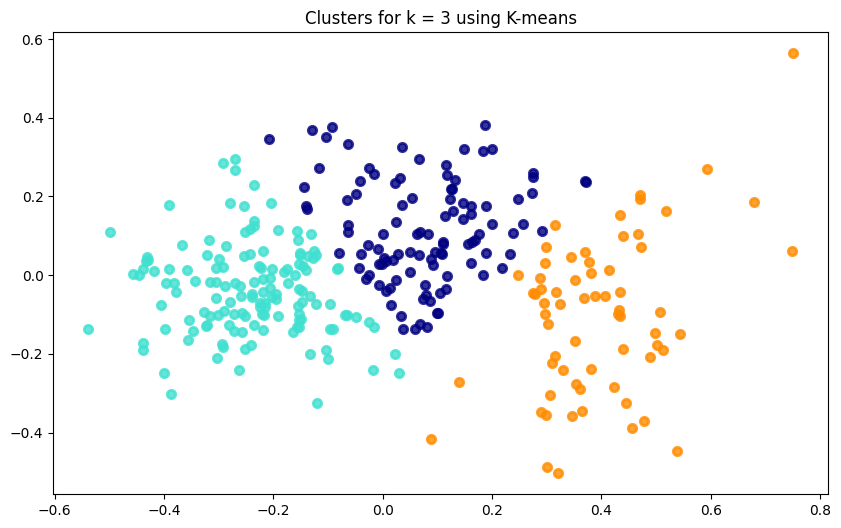

cluster 0
Normal: 24
Hernia: 8
Spondylolisthesis: 73

cluster 1
Normal: 73
Hernia: 51
Spondylolisthesis: 16

cluster 2
Normal: 3
Hernia: 1
Spondylolisthesis: 61

['Spondylolisthesis', 'Normal', 'Spondylolisthesis']


In [30]:
# K-means clustering with k = 3
k = 3
kmeans = KMeans(n_clusters=k,
                random_state=0)
cluster_labels = kmeans.fit_predict(X_scaled)

# Plot the data with y = ground truth
target_names = y.unique()
colors = ['navy', 'turquoise', 'darkorange']
plt.figure(figsize=(10, 6))

for i, targets in enumerate(target_names):
    plt.scatter(X_pca[y==targets,0],
                X_pca[y==targets,1],
                color=colors[i],
                alpha=.8,
                lw=2,
                label=targets)

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('Points with Ground truth')
plt.savefig(IMAGES_DIR / 'ground_truth.png')
plt.show()

# Plot the data with y = cluster labels
plt.figure(figsize=(10, 6))



for i, targets in enumerate(target_names):
    plt.scatter(X_pca[cluster_labels==i,0],
                X_pca[cluster_labels==i,1],
                color=colors[i],
                alpha=.8,
                lw=2)

plt.title('Clusters for k = 3 using K-means')
plt.savefig(IMAGES_DIR / 'clusters.png')
plt.show()

# Clusters if we assigned the max ground truth class to each cluster
# Attribute Cluster label to a ground truth class
clusters = {i: [] for i in range(3)}
for i in range(len(cluster_labels)):
    clusters[cluster_labels[i]].append(y[i])
for i in range(len(clusters)):
    print(f'cluster {i}')
    print(f'Normal: {clusters[i].count("Normal")}')
    print(f'Hernia: {clusters[i].count("Hernia")}')
    print(f'Spondylolisthesis: {clusters[i].count("Spondylolisthesis")}\n')
lista = [max(clusters[i], key=clusters[i].count) for i in range(3)]
print(lista)

plt.figure(figsize=(10, 6))
for i, targets in enumerate(target_names):
    plt.scatter(X_pca[cluster_labels==i,0],
                X_pca[cluster_labels==i,1],
                color=colors[i],
                alpha=.8,
                lw=2,
                label=lista[i])
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('Clusters for k = 3 using K-means and labelled with the most frequent class')
plt.savefig(IMAGES_DIR / 'clusters_frequency.png')
plt.show()

# Question 4

Using the results we obtained for Question 1 and Question 3, we conclude that one may use clustering to identify groups of patients with similar characteristics to perform a potential diagnosis on a new patient or even to subtype groups inside a major one for specific treatments. However, one need to be careful while fine-tuning the clusters, due to the trade-off we observed between silhouette and purity scores.
In addition, one may use PCA to reduce the dimensionality of the data and identify the most relevant features for the clustering task.
However, one need to be careful while selecting the number of principal components to retain, as this may affect the amount of information retained in the data. Also, we need to be careful, since the clusters might not represent quite well the classes of the patients.
It's important to recognize that the clusters generated through clustering may not perfectly align with the known classes of patients.
For instance, in Question 3, where we plotted three clusters and have three ground truth classes, the cluster-class mapping is not straightforward, since the clusters do not represent the classes in a one-to-one fashion.
Two clusters may correspond to the same class, as we can see in the labelled clusters using the most frequent class. Suggestions for merging these clusters into one may be considered in further post-processing steps.
The third cluster, representing a mix of about 50% Normal and 50% Hernia, does not effectively represent the known classes. This incongruity can pose mistakes if used for diagnosis.
In light of these considerations, the application of clustering for diagnosis requires careful attention. While it can be a valuable tool for identifying patient groups with similar characteristics, it should be complemented with domain knowledge and a thorough understanding of the data.